# Collaborative filtering using fastai

In [1]:
import pandas as pd

In [2]:
df = pd.read_hdf("reviews_small.h5", "df")

In [3]:
df.head()

,product_id,recommended,date,username
0,646380.0,1.0,"7 December, 2017",S0_GosU
1,570.0,1.0,2018-07-09,S0_GosU
2,450390.0,1.0,2018-07-09,S0_GosU
3,368730.0,0.0,2017-03-25,S0_GosU
4,26800.0,1.0,2018-07-09,S0_GosU


## preprocessing for fasatai

In [4]:
from fastai.collab import *
from fastai.tabular import *

user, item, title = "userId", "movieId", "title"

In [5]:
df = df.drop(["date"], axis=1)

In [6]:
df.head()

,product_id,recommended,username
0,646380.0,1.0,S0_GosU
1,570.0,1.0,S0_GosU
2,450390.0,1.0,S0_GosU
3,368730.0,0.0,S0_GosU
4,26800.0,1.0,S0_GosU


In [77]:
df.shape

(1735173, 3)

## training collab

In [81]:
df_shuffle = df.sample(frac=1).reset_index(drop=True)

In [82]:
df_shuffle.head()

,product_id,recommended,username
0,611790.0,1.0,Grunt95
1,233470.0,0.0,「Ｂｏｋｕ♥」
2,821610.0,0.0,Beans
3,302710.0,0.0,Styxplorer
4,346920.0,0.0,(YouTube)Dragnix


In [31]:
df_small = df.iloc[:200000]

In [32]:
df_small.shape

(200000, 3)

In [83]:
data = CollabDataBunch.from_df(
    df_shuffle, user_name="username", item_name="product_id", rating_name="recommended", seed=36
)

In [79]:
# `CollabDataBunch.from_df` does spliting into train and validation set. 

In [84]:
data

TabularDataBunch;

Train: LabelList (1388139 items)
x: CollabList
username Grunt95; product_id 611790.0; ,username 「Ｂｏｋｕ♥」; product_id 233470.0; ,username Beans; product_id 821610.0; ,username Styxplorer; product_id 302710.0; ,username (YouTube)Dragnix; product_id 346920.0; 
y: FloatList
1.0,0.0,0.0,0.0,0.0
Path: .;

Valid: LabelList (347034 items)
x: CollabList
username Dwigt; product_id 383980.0; ,username lmao; product_id 292030.0; ,username o}}{{![)3; product_id 44350.0; ,username unknowncity; product_id 214570.0; ,username BIRDMAN ~ VEGAN FUTURE; product_id 813630.0; 
y: FloatList
1.0,1.0,1.0,0.0,1.0
Path: .;

Test: None

In [85]:
learn = collab_learner(data, n_factors=50)

In [86]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.63E-01
Min loss divided by 10: 6.31E-02


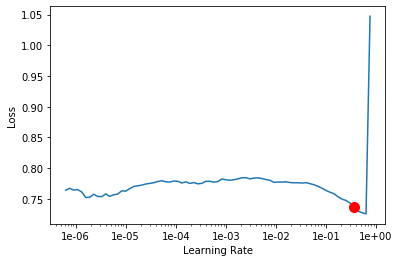

In [87]:
learn.recorder.plot(suggestion=True)

In [88]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.36307805477010097

In [89]:
#lr is very unstable,I choose `0.005` to stay on the save side.
lr = 0.005

In [90]:
%%time
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,time
0,0.176306,0.177609,02:09
1,0.191908,0.182449,02:08
2,0.155434,0.166577,02:06
3,0.115129,0.155820,02:03
4,0.082594,0.156466,02:19


CPU times: user 9min 2s, sys: 1min 26s, total: 10min 28s
Wall time: 10min 47s


In [91]:
learn.save('dotprod')